## IT'S.....EL NINO/LA NINA TELECONNECTIONS TIME!

### What is El Nino and why do we care?
- remember: El Nino (La Nina) is the anomalous warming (cooling) of a certain region in the Pacific Ocean
<br><br>
- interestingly, what happens there can have far reaching impacts on our weather here (example: precipitation patterns in the US, track of low pressure systems, etc!) - as well as weather *globally*
<br><br>
- more scientific background? https://oceanservice.noaa.gov/facts/ninonina.html.

### How do we evaluate El Nino vs. La Nina?
**Spatially**
- the average sea-surface temperature (SST) anomalies in the Nino 3.4 region (5S to 5N, 120W to 170W), seen below 
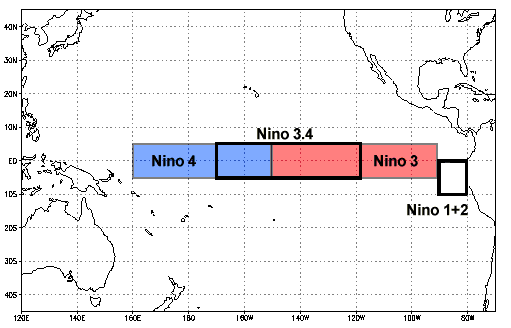
- if can't see above image, or for more information, see: https://www.ncdc.noaa.gov/teleconnections/enso/indicators/sst/

**Temporally**
- 5 consecutive months with 3-month running mean SST anomaly of a least 0.5 deg C (El Nino) or below -0.5 deg C (La Nina)

### On this assignment, you'll be analyzing correlations between precipitation and SST anomalies and precipitation elsewhere!

### (1)  Read in and initially process your data
*Data*
- precip: precip.mon.anom.nc
- SST: sst.mon.anom.nc

*Initial processing*
- for guidance on what is necessary, processing-wise: print out the coordinates of each variable, and keep in mind you'll want to be able to align these variables in your analysis.  Then, process accordingly!
- hint: NO merger necessary!

In [1]:
import pandas as pd
import numpy as np
import xarray as xr
from matplotlib import pyplot as plt
import cartopy.feature as cfeature
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
import numpy as np

precip= xr.open_dataarray('data/week13/precip.mon.anom.nc')
print(precip)
# LATS ARE ARRANGED FROM NORTH TO SOUTH!!!!

<xarray.DataArray 'precip' (time: 876, lat: 72, lon: 144)>
[9082368 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 88.75 86.25 83.75 81.25 ... -83.75 -86.25 -88.75
  * lon      (lon) float32 1.25 3.75 6.25 8.75 11.25 ... 351.2 353.8 356.2 358.8
  * time     (time) datetime64[ns] 1948-01-01 1948-02-01 ... 2020-12-01
Attributes:
    long_name:     Average Monthly Rate of Precipitation
    valid_range:   [-50.  50.]
    units:         mm/day
    actual_range:  [-19.49  28.87]
    Fill_Value:    -9.96921e+36
    precision:     2
    var_desc:      Precipitation
    level_desc:    Surface
    dataset:       Precipitation Reconstruction (PREC)
    statistic:     Anomaly
    parent_stat:   Gauge


In [2]:
sst_anom = xr.open_dataarray('data/week13/sst.mon.anom.nc')
print(sst_anom)
# LATS ARE ARRANGED SOUTH TO NORTH - THIS IS DIFFERENT THAN PRECIP
print(sst_anom.time)

<xarray.DataArray 'sst' (time: 1982, lat: 36, lon: 72)>
[5137344 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 -87.5 -82.5 -77.5 -72.5 -67.5 ... 72.5 77.5 82.5 87.5
  * lon      (lon) float32 2.5 7.5 12.5 17.5 22.5 ... 342.5 347.5 352.5 357.5
  * time     (time) datetime64[ns] 1856-01-01 1856-02-01 ... 2021-02-01
Attributes:
    long_name:     Monthly Anomalies of SST
    valid_range:   [-8.  8.]
    units:         degC
    precision:     2
    var_desc:      Sea Surface Temperature
    dataset:       Kaplan Extended SST V2
    level_desc:    Surface
    statistic:     Anomaly
    parent_stat:   Other
    actual_range:  [-4.577      6.4610415]
<xarray.DataArray 'time' (time: 1982)>
array(['1856-01-01T00:00:00.000000000', '1856-02-01T00:00:00.000000000',
       '1856-03-01T00:00:00.000000000', ..., '2020-12-01T00:00:00.000000000',
       '2021-01-01T00:00:00.000000000', '2021-02-01T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) 

In [3]:
# Precip and SST cover different time periods
# Let's slice each of them so they are covering the same time period
# The below automates this using NumPy functionality that finds the intersection of the time indices of each array
# You could manually slice this using hardwiring, but I encourage you to think about automation
# Why? What if we were working with many more datasets that had varying time coverage?
same_times = np.intersect1d(sst_anom.time,precip.time)
print(same_times)
sst_anom=sst_anom.sel(time=same_times)
precip = precip.sel(time=same_times)

print(sst_anom)
print(precip)

['1948-01-01T00:00:00.000000000' '1948-02-01T00:00:00.000000000'
 '1948-03-01T00:00:00.000000000' '1948-04-01T00:00:00.000000000'
 '1948-05-01T00:00:00.000000000' '1948-06-01T00:00:00.000000000'
 '1948-07-01T00:00:00.000000000' '1948-08-01T00:00:00.000000000'
 '1948-09-01T00:00:00.000000000' '1948-10-01T00:00:00.000000000'
 '1948-11-01T00:00:00.000000000' '1948-12-01T00:00:00.000000000'
 '1949-01-01T00:00:00.000000000' '1949-02-01T00:00:00.000000000'
 '1949-03-01T00:00:00.000000000' '1949-04-01T00:00:00.000000000'
 '1949-05-01T00:00:00.000000000' '1949-06-01T00:00:00.000000000'
 '1949-07-01T00:00:00.000000000' '1949-08-01T00:00:00.000000000'
 '1949-09-01T00:00:00.000000000' '1949-10-01T00:00:00.000000000'
 '1949-11-01T00:00:00.000000000' '1949-12-01T00:00:00.000000000'
 '1950-01-01T00:00:00.000000000' '1950-02-01T00:00:00.000000000'
 '1950-03-01T00:00:00.000000000' '1950-04-01T00:00:00.000000000'
 '1950-05-01T00:00:00.000000000' '1950-06-01T00:00:00.000000000'
 '1950-07-01T00:00:00.000

In [4]:
# No need to interpolate the lat, lons of precip to SST or vice versa
# As ultimately we'll be aligning, for correlations and regresion, a time series of spatially averaged Nino 3.4 SST data
# To a 3D precip data array - lat, lon, time - effectively, a time series of precip data at each grid point
# We'll be aligning along the time dimension

### (2)  Averaging, smoothing, and plotting
#### (a) Take a spatial average over the Nino 3.4 region

#### (b)  And then a 3-month rolling mean of the resulting spatially-averaged data, saved to a new variable
- There is functionality in Xarray for this comparable to Pandas!

#### (c)  Now, PLOT this data you produced in (b) against that in (a) - without the rolling mean
- it should be a time series and look something like this (you don't have to fill in curves though): https://www.ncdc.noaa.gov/monitoring-content/teleconnections/eln-f-pg.gif
- you should, however, add a horizontal line passing through y = 0 so your plot is easier to interpret!
- as well as color-coded lines for the El Nino and La Nina thresholds

#### (d.)  For rest of assignment, please use the UNSMOOTHED data from (a) as I believe that is what is used for these official NOAA analyses

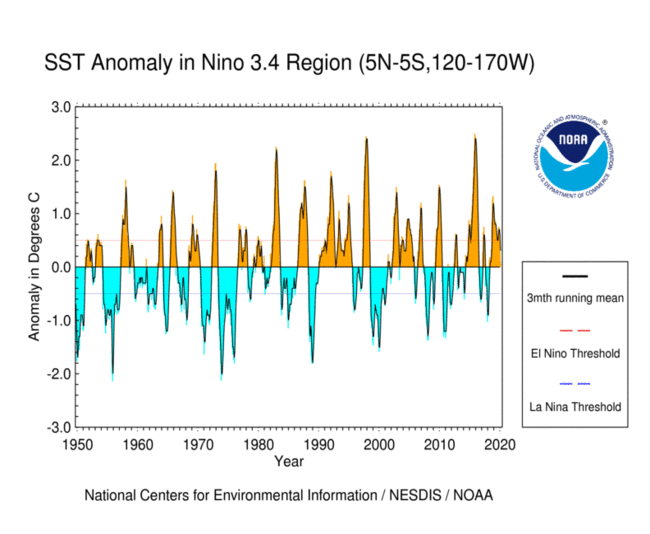

In [5]:
# (a) Take spatial average of SST over the Nino 3.4 region of interest
# The grid spacing is pretty coarse, and latitude goes -7.5, -2.5, 2.5, 7.5
# So you could alternatively use -7.5 to 7.5 for lat
# And similarly for longitude
# To be super precise we'd want to take some type of interpolation, but that's not necessary today
# 

                                        # Did you convert your longitudes correctly?
nino_34 = sst_anom.sel(lat=slice(-5, 5), lon=slice(190, 240))
nino_34_mean = nino_34.mean(dim=('lon', 'lat'),skipna=True)

print(nino_34_mean)

<xarray.DataArray 'sst' (time: 876)>
array([-6.46500066e-02,  2.63500035e-01,  4.24100012e-01,  3.14150035e-01,
        4.38650042e-01,  2.87300020e-01,  1.65700018e-01, -6.87500015e-02,
       -3.70400012e-01, -7.47500062e-01, -4.57250029e-01,  4.71000001e-02,
       -3.43500018e-01, -8.49500000e-02, -6.36799932e-01,  3.70000005e-02,
        2.80649990e-01, -4.10300016e-01, -3.03550005e-01, -2.40600020e-01,
       -3.39350045e-01, -7.84650028e-01, -1.23645008e+00, -1.23490024e+00,
       -1.04315007e+00, -1.49235010e+00, -1.06325018e+00, -8.50050151e-01,
       -1.19930005e+00, -5.65800071e-01, -4.51750040e-01, -4.29450035e-01,
       -8.75350118e-01, -6.50300026e-01, -8.63400102e-01, -6.86849952e-01,
       -7.44400024e-01, -5.62699974e-01, -2.46700019e-01,  3.99999740e-03,
        1.04100004e-01,  3.67399991e-01,  5.09500027e-01,  4.92150009e-01,
        6.85850024e-01,  5.30400038e-01,  6.42350018e-01,  3.98550034e-01,
        3.76900017e-01,  2.78700024e-01, -1.83499996e-02,  5.01

In [6]:
# (b) Take 3 month rolling mean
nino_34_roll_mean = nino_34_mean.rolling(time=3).mean(skipna=True)
print(nino_34_roll_mean)

<xarray.DataArray 'sst' (time: 876)>
array([            nan,             nan,  2.07650026e-01,  3.33916664e-01,
        3.92300010e-01,  3.46700033e-01,  2.97216694e-01,  1.28083348e-01,
       -9.11499957e-02, -3.95550013e-01, -5.25050044e-01, -3.85883371e-01,
       -2.51216690e-01, -1.27116670e-01, -3.55083307e-01, -2.28249967e-01,
       -1.06383314e-01, -3.08833420e-02, -1.44400011e-01, -3.18150004e-01,
       -2.94500013e-01, -4.54866727e-01, -7.86816756e-01, -1.08533343e+00,
       -1.17150005e+00, -1.25680017e+00, -1.19958337e+00, -1.13521679e+00,
       -1.03753344e+00, -8.71716817e-01, -7.38950094e-01, -4.82333382e-01,
       -5.85516731e-01, -6.51700060e-01, -7.96350082e-01, -7.33516693e-01,
       -7.64883359e-01, -6.64649963e-01, -5.17933369e-01, -2.68466651e-01,
       -4.62000072e-02,  1.58499996e-01,  3.27000002e-01,  4.56350009e-01,
        5.62500040e-01,  5.69466670e-01,  6.19533380e-01,  5.23766677e-01,
        4.72599983e-01,  3.51383368e-01,  2.12416689e-01,  2.53

<xarray.DataArray 'sst' (time: 876)>
array([            nan,             nan,  2.07650026e-01,  3.33916664e-01,
        3.92300010e-01,  3.46700033e-01,  2.97216694e-01,  1.28083348e-01,
       -9.11499957e-02, -3.95550013e-01, -5.25050044e-01, -3.85883371e-01,
       -2.51216690e-01, -1.27116670e-01, -3.55083307e-01, -2.28249967e-01,
       -1.06383314e-01, -3.08833420e-02, -1.44400011e-01, -3.18150004e-01,
       -2.94500013e-01, -4.54866727e-01, -7.86816756e-01, -1.08533343e+00,
       -1.17150005e+00, -1.25680017e+00, -1.19958337e+00, -1.13521679e+00,
       -1.03753344e+00, -8.71716817e-01, -7.38950094e-01, -4.82333382e-01,
       -5.85516731e-01, -6.51700060e-01, -7.96350082e-01, -7.33516693e-01,
       -7.64883359e-01, -6.64649963e-01, -5.17933369e-01, -2.68466651e-01,
       -4.62000072e-02,  1.58499996e-01,  3.27000002e-01,  4.56350009e-01,
        5.62500040e-01,  5.69466670e-01,  6.19533380e-01,  5.23766677e-01,
        4.72599983e-01,  3.51383368e-01,  2.12416689e-01,  2.53

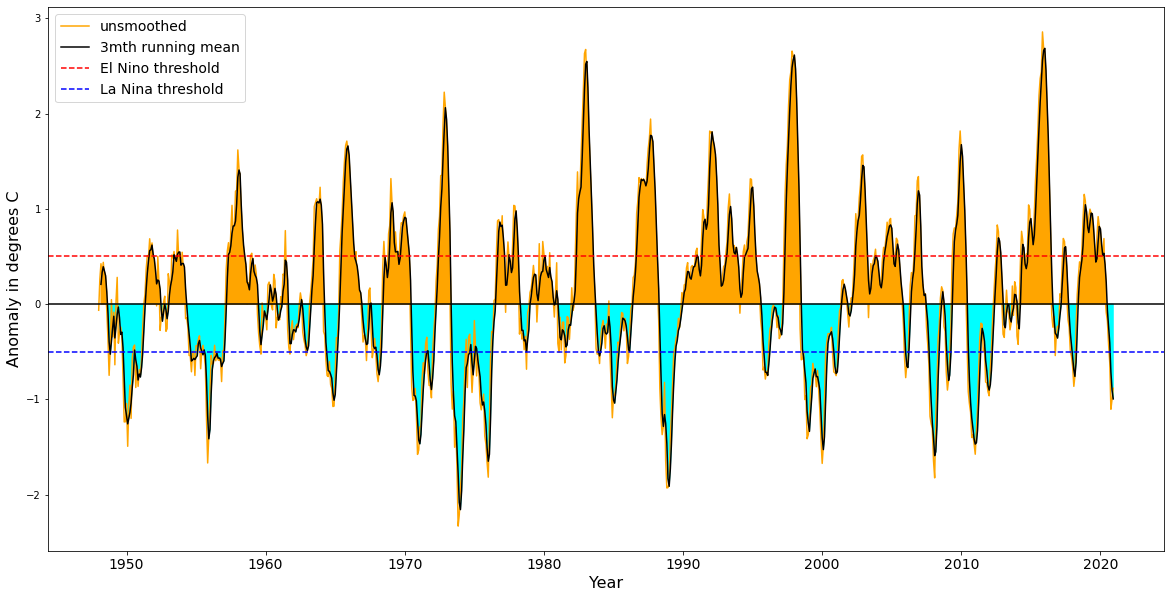

In [7]:
# (c)  Now, plot!
fig,ax=plt.subplots(figsize=(20,10))
ax.plot(nino_34_mean['time'],nino_34_mean,c='orange',label='unsmoothed')
ax.plot(nino_34_roll_mean['time'],nino_34_roll_mean,c='black',label='3mth running mean')

ax.axhline(y=0.5, color='r', linestyle='--',label='El Nino threshold')
ax.axhline(y=-0.5, color='b', linestyle='--',label='La Nina threshold')
ax.axhline(y=0, color='k', linestyle='-')

# This is a useful function that fills between values we pass it
# Allowing us to quite closely reproduce the NOAA plot that does similar 
ax.fill_between(nino_34_roll_mean['time'].values, nino_34_roll_mean, 0, where=(nino_34_roll_mean > 0), color='orange')
ax.fill_between(nino_34_roll_mean['time'].values, nino_34_roll_mean, 0, where=(nino_34_roll_mean < 0), color='cyan')

ax.set_xlabel('Year',fontsize=16)
ax.tick_params(axis="x", labelsize=14)
ax.set_ylabel('Anomaly in degrees C',fontsize=16)
ax.legend(fontsize=14)

print(nino_34_roll_mean)

### (3)  Great!  Now,  let's further process our data to prep it for correlation analysis, by evaluating the seasonal average of each SST and each precipitation for EACH year (NOT an average over all years)

In [8]:
# Let's do this step by step!
# First for SST 
# Let's resample, to a QUARTERLY frequency (some Pandas functionality is aimed towards financial type analyses!)
# But we must specify this in a way that will ensure our seasons are DJF, MAM, JJA, SON
# One way: specify that year ends in feb via 'Q-FEB', where Q stands for quarterly
# This splits into our seasons properly
# Then we take the mean
# And therefore get our seasonal averages!
seasons = nino_34_mean.resample(time='Q-FEB').mean(dim='time')
print(seasons.time)

<xarray.DataArray 'time' (time: 293)>
array(['1948-02-29T00:00:00.000000000', '1948-05-31T00:00:00.000000000',
       '1948-08-31T00:00:00.000000000', ..., '2020-08-31T00:00:00.000000000',
       '2020-11-30T00:00:00.000000000', '2021-02-28T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 1948-02-29 1948-05-31 ... 2021-02-28


In [9]:
# All our seasons are in one data structure - next let's pull out individual seasons
# How?

# One way - note that the times in our seasonal average array are either for Febs, Mays, Augusts, etc

# So, for DJF season
# Remember how we access month attribute of time?
print(seasons['time.month']==2)  # This is a 1D boolean array, which we can use for indexing purposes!  Neat!

# So!
DJF_sst = seasons.sel(time=seasons['time.month'] == 2)
MAM_sst = seasons.sel(time=seasons['time.month'] == 5)
JJA_sst = seasons.sel(time=seasons['time.month'] == 8)
SON_sst = seasons.sel(time=seasons['time.month'] == 11)

print(DJF_sst)

<xarray.DataArray 'month' (time: 293)>
array([ True, False, False, False,  True, False, False, False,  True,
       False, False, False,  True, False, False, False,  True, False,
       False, False,  True, False, False, False,  True, False, False,
       False,  True, False, False, False,  True, False, False, False,
        True, False, False, False,  True, False, False, False,  True,
       False, False, False,  True, False, False, False,  True, False,
       False, False,  True, False, False, False,  True, False, False,
       False,  True, False, False, False,  True, False, False, False,
        True, False, False, False,  True, False, False, False,  True,
       False, False, False,  True, False, False, False,  True, False,
       False, False,  True, False, False, False,  True, False, False,
       False,  True, False, False, False,  True, False, False, False,
        True, False, False, False,  True, False, False, False,  True,
       False, False, False,  True, False, False, Fa

In [10]:
# Other methods that folks tried that were sometimes subtly incorrect, involving groupby + related:
# If you groupby year and then do stuff, your DJF average will be taken from J, F, and D from that year, instead of
# December from the previous year.  This is not quite right!

In [11]:
# Now same as above but for precip!
                                           
seasons_p = precip.resample(time='Q-FEB').mean(dim='time')

DJF_precip = seasons_p.sel(time=seasons['time.month'] == 2)
MAM_precip = seasons_p.sel(time=seasons['time.month'] == 5)
JJA_precip = seasons_p.sel(time=seasons['time.month'] == 8)
SON_precip = seasons_p.sel(time=seasons['time.month'] == 11)

### (4)  To prepare you to set up the correlation in the next Q, print out the dimensions each of your seasonal precip + your seasonal SST variables.

In [12]:
print(DJF_sst)
print(DJF_precip)
# Excellent! We will align along the time dim
# Which is the same length for each!
# And covers the exact same times

<xarray.DataArray 'sst' (time: 74)>
array([ 0.09942502, -0.12711667, -1.2568002 , -0.66464996,  0.35138336,
        0.09741667,  0.42570004, -0.5420667 , -0.93923336, -0.35223332,
        1.4078168 ,  0.47875   , -0.16273333, -0.06576668, -0.2734167 ,
       -0.43788338,  0.83620006, -0.70725006,  1.3167667 , -0.2906167 ,
       -0.6864    ,  1.0638833 ,  0.90218335, -1.4662167 , -0.5940167 ,
        1.6580168 , -1.9587499 , -0.44328332, -1.5757166 ,  0.69385004,
        0.7838667 ,  0.08196667,  0.5075167 , -0.16146669, -0.01736516,
        2.5469625 , -0.487097  , -1.039251  , -0.47702488,  1.2973536 ,
        0.81649655, -1.7297553 ,  0.12503691,  0.4923691 ,  1.8074998 ,
        0.4513437 ,  0.1603425 ,  1.0277506 , -0.7471395 , -0.32160723,
        2.4680812 , -1.3356642 , -1.5267477 , -0.7103197 , -0.06919345,
        1.186081  ,  0.3254204 ,  0.59147877, -0.65168935,  0.8181768 ,
       -1.5905104 , -0.8013809 ,  1.5517712 , -1.4547515 , -0.84536   ,
       -0.21823037, -0.19497

### (5) Correlation time!
#### (a.) For each season, calculate the correlation between SST anomaly in Nino 3.4 (so, a time series)  and precip anomaly anywhere globally
- Xarray has a correlation function!

#### (b.) Plot for each season, zoomed in on the USA, with all four seasons one ONE plot (so - you're creating a panel plot consisting of 4 subplots)
- pick a colormap that will help you compare to the map in (d)

#### (c.)  In at least a few sentences, describe:
- i. what does a positive or negative correlation mean, physically, in your analysis?
- ii. for DJF, at least two striking patterns in the correlation map
- iii. for DJF, describe if those patterns are more likely in El Nino or La Nina years (remember what El Nino vs. La Nina tells us about the SST anomalies)
  - we could, but will not now, do all of the above explicitly using only El Nino or La Nina years, but we're keeping things more simple for now

#### (d.)  Confirm your DJF plot with the one produced by NOAA here.  Does yours look similar?

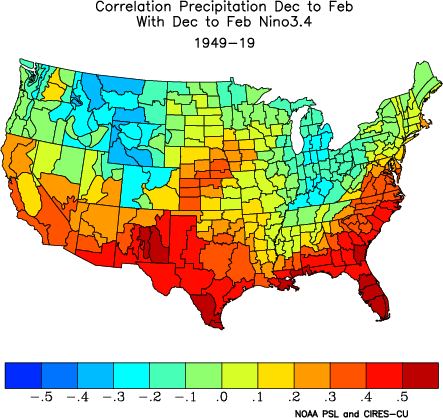 (Can't see image? Try: https://psl.noaa.gov/cgi-bin/data/usclimdivs/climdiv.corr.pl?variab=Precipitation&mon1=12&mon2=2&imonflag=0&iy%5B1%5D=&iy%5B2%5D=&type=8&timefile=&lagtype=0&ilead=0&ilag=0&xlow=&xhi=&xint=&Submit=Create+Plot)

In [13]:
# (a) Now calculate the correlations!

corr_DJF = xr.corr(DJF_sst,DJF_precip,dim='time')
#corr_MAM = xr.corr(MAM_sst,MAM_precip,dim='time')
#corr_JJA = xr.corr(JJA_sst,JJA_precip,dim='time')
#corr_SON = xr.corr(SON_sst,SON_precip,dim='time')

print(corr_DJF) # just 2D spatial array - no time component - we took correlation over time dimension and therefore collapsed it

<xarray.DataArray (lat: 72, lon: 144)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * lat      (lat) float32 88.75 86.25 83.75 81.25 ... -83.75 -86.25 -88.75
  * lon      (lon) float32 1.25 3.75 6.25 8.75 11.25 ... 351.2 353.8 356.2 358.8


/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1670: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1670: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


In [14]:
# To automate plotting
# Let's concatenate these four seasonal correlation grids
# Into one data array!
# We create a new dimension called season

all_corr = xr.concat([corr_DJF,corr_MAM,corr_JJA,corr_SON],dim='season')
print(all_corr)

NameError: name 'corr_MAM' is not defined

In [ ]:
# (b) First plot globally for fun - so many cool teleconnections! YAY!

import cartopy.crs as ccrs 

cmap='jet'
fig, axes = plt.subplots(2,2,figsize=(20,10), subplot_kw=dict(projection=ccrs.PlateCarree()))


# Set up map stuff for later
states_provinces = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_1_states_provinces_lines',
    scale='50m',
    facecolor='none')
 
seasons=['DJF','MAM','JJA','SON']
# Iterate through axes and add titles and map stuffs
i = 0
for ax in axes.flatten():
    print(ax)
    all_corr.sel(season=i).plot(ax=ax,cmap=cmap,vmin=all_corr.min(),vmax=all_corr.max(),cbar_kwargs={'label': 'corr'})
    ax.set_title('Correlations: '+seasons[i])
    i = i+1
    ax.add_feature(cfeature.LAND)
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS)
    ax.add_feature(states_provinces, edgecolor='black')

In [ ]:
# Now just United States

import cartopy.crs as ccrs 

cmap='jet'
fig, axes = plt.subplots(2,2,figsize=(20,10), subplot_kw=dict(projection=ccrs.PlateCarree()))

# Set up map stuff for later
states_provinces = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_1_states_provinces_lines',
    scale='50m',
    facecolor='none')
 
seasons=['DJF','MAM','JJA','SON']
# Iterate through axes and plot each season, add titles, other features (map features)
i = 0
for ax in axes.flatten():
    print(ax)                                   # we want colorscale to be same for each plot   # label colorbar
    all_corr.sel(season=i).plot(ax=ax,cmap=cmap,vmin=all_corr.min(),vmax=all_corr.max(),cbar_kwargs={'label': 'corr'})
    ax.set_title('Correlations: '+seasons[i])
    i = i+1
    ax.add_feature(cfeature.LAND)
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS)
    ax.add_feature(states_provinces, edgecolor='black')
    ax.set_extent([360-140,360-66.95,49.35,24.74,])
    
# To be directly comparable to NOAA's plot we'd use a different colorscale but this is close enough

In [ ]:
# (c) Interpretation time!
# i. Here, a positive correlation means when SST anomalies in Nino 3.4 are higher, precipitation at that location tends to be greater
# and vice versa
# ii. There's a pretty strong positive correlation (relatively speaking) in the lower third of the US, especially in the Gulf
# of Mexico (higher SSTS = more precip in these regions); negative correlation in the Midwest (higher SSTs tend to be associated with
# less precipitation
# iii. El Nino 

# (d) Yes - this is quite similar to the plot from NOAA!

#### (6)  We could have, alternatively, or additionally, in the above analysis taken into account El Nino vs. La Nina years explicitly and then analyzed relationships.....but we'll stop here for today
- The key is that warmer SSTs in Nino 3.4 are generally associated with certain patterns in precipitation, and the same with colder SSTS in Nino 3.4

In [ ]:
import pandas as pd
import numpy as np
import xarray as xr
from matplotlib import pyplot as plt
import cartopy.feature as cfeature
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
import numpy as np

precip= xr.open_dataarray('precip.mon.anom.nc')
print(precip)
# LATS ARE ARRANGED FROM NORTH TO SOUTH!!!!

In [ ]:
sst_anom = xr.open_dataarray('sst.mon.anom.nc')
print(sst_anom)
# LATS ARE ARRANGED SOUTH TO NORTH - THIS IS DIFFERENT THAN PRECIP
print(sst_anom.time)

In [ ]:
# Precip and SST cover different time periods
# Let's slice eaeech of them so they are covering the same time period
# The below automates this using NumPy functionality that finds the intersection of the time indices of each array
# You could manually slice this using hardwiring, but I encourage you to think about automation
# Why? What if we were working with many more datasets that had varying time coverage?
same_times = np.intersect1d(sst_anom.time,precip.time)
print(same_times)
sst_anom=sst_anom.sel(time=same_times)
precip = precip.sel(time=same_times)

print(sst_anom)
print(precip)

In [ ]:
# No need to interpolate the lat, lons of precip to SST or vice versa
# As ultimately we'll be aligning, for correlations and regresion, a time series of spatially averaged Nino 3.4 SST data
# To a 3D precip data array - lat, lon, time - effectively, a time series of precip data at each grid point
# We'll be aligning along the time dimension

### (2)  Averaging, smoothing, and plotting
#### (a) Take a spatial average over the Nino 3.4 region

#### (b)  And then a 3-month rolling mean of the resulting spatially-averaged data, saved to a new variable
- There is functionality in Xarray for this comparable to Pandas!

#### (c)  Now, PLOT this data you produced in (b) against that in (a) - without the rolling mean
- it should be a time series and look something like this (you don't have to fill in curves though): https://www.ncdc.noaa.gov/monitoring-content/teleconnections/eln-f-pg.gif
- you should, however, add a horizontal line passing through y = 0 so your plot is easier to interpret!
- as well as color-coded lines for the El Nino and La Nina thresholds

#### (d.)  For rest of assignment, please use the UNSMOOTHED data from (a) as I believe that is what is used for these official NOAA analyses

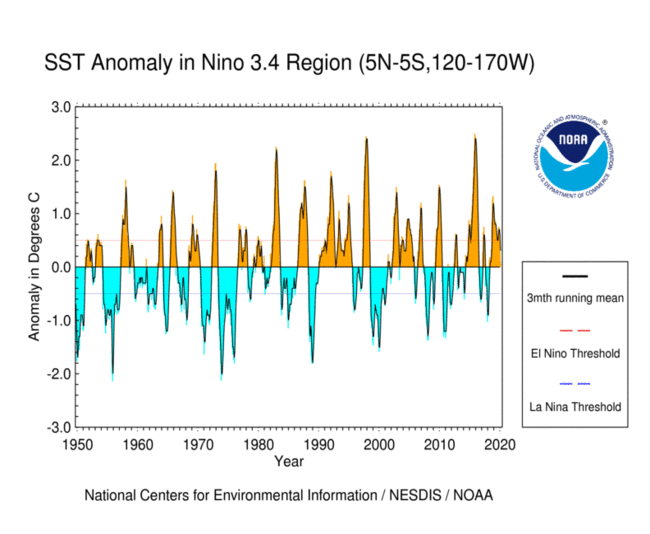

In [ ]:
# (a) Take spatial average of SST over the Nino 3.4 region of interest
# The grid spacing is pretty coarse, and latitude goes -7.5, -2.5, 2.5, 7.5
# So you could alternatively use -7.5 to 7.5 for lat
# And similarly for longitude
# To be super precise we'd want to take some type of interpolation, but that's not necessary today
# 

                                        # Did you convert your longitudes correctly?
nino_34 = sst_anom.sel(lat=slice(-5, 5), lon=slice(190, 240))
nino_34_mean = nino_34.mean(dim=('lon', 'lat'),skipna=True)

print(nino_34_mean)

In [ ]:
# (b) Take 3 month rolling mean
nino_34_roll_mean = nino_34_mean.rolling(time=3).mean(skipna=True)
print(nino_34_roll_mean)

In [ ]:
# (c)  Now, plot!
fig,ax=plt.subplots(figsize=(20,10))
ax.plot(nino_34_mean['time'],nino_34_mean,c='orange',label='unsmoothed')
ax.plot(nino_34_roll_mean['time'],nino_34_roll_mean,c='black',label='3mth running mean')

ax.axhline(y=0.5, color='r', linestyle='--',label='El Nino threshold')
ax.axhline(y=-0.5, color='b', linestyle='--',label='La Nina threshold')
ax.axhline(y=0, color='k', linestyle='-')

# This is a useful function that fills between values we pass it
# Allowing us to quite closely reproduce the NOAA plot that does similar 
ax.fill_between(nino_34_roll_mean['time'].values, nino_34_roll_mean, 0, where=(nino_34_roll_mean > 0), color='orange')
ax.fill_between(nino_34_roll_mean['time'].values, nino_34_roll_mean, 0, where=(nino_34_roll_mean < 0), color='cyan')

ax.set_xlabel('Year',fontsize=16)
ax.tick_params(axis="x", labelsize=14)
ax.set_ylabel('Anomaly in degrees C',fontsize=16)
ax.legend(fontsize=14)

print(nino_34_roll_mean)

### (3)  Great!  Now,  let's further process our data to prep it for correlation analysis, by evaluating the seasonal average of each SST and each precipitation for EACH year (NOT an average over all years)

In [ ]:
# Let's do this step by step!
# First for SST 
# Let's resample, to a QUARTERLY frequency (some Pandas functionality is aimed towards financial type analyses!)
# But we must specify this in a way that will ensure our seasons are DJF, MAM, JJA, SON
# One way: specify that year ends in feb via 'Q-FEB', where Q stands for quarterly
# This splits into our seasons properly
# Then we take the mean
# And therefore get our seasonal averages!
seasons = nino_34_mean.resample(time='Q-FEB').mean(dim='time')
print(seasons.time)

In [ ]:
# All our seasons are in one data structure - next let's pull out individual seasons
# How?

# One way - note that the times in our seasonal average array are either for Febs, Mays, Augusts, etc

# So, for DJF season
# Remember how we access month attribute of time?
print(seasons['time.month']==2)  # This is a 1D boolean array, which we can use for indexing purposes!  Neat!

# So!
DJF_sst = seasons.sel(time=seasons['time.month'] == 2)
MAM_sst = seasons.sel(time=seasons['time.month'] == 5)
JJA_sst = seasons.sel(time=seasons['time.month'] == 8)
SON_sst = seasons.sel(time=seasons['time.month'] == 11)

print(DJF_sst)

In [ ]:
# Other methods that folks tried that were sometimes subtly incorrect, involving groupby + related:
# If you groupby year and then do stuff, your DJF average will be taken from J, F, and D from that year, instead of
# December from the previous year.  This is not quite right!

In [ ]:
# Now same as above but for precip!
                                           
seasons_p = precip.resample(time='Q-FEB').mean(dim='time')

DJF_precip = seasons_p.sel(time=seasons['time.month'] == 2)
MAM_precip = seasons_p.sel(time=seasons['time.month'] == 5)
JJA_precip = seasons_p.sel(time=seasons['time.month'] == 8)
SON_precip = seasons_p.sel(time=seasons['time.month'] == 11)

### (4)  To prepare you to set up the correlation in the next Q, print out the dimensions each of your seasonal precip + your seasonal SST variables.

In [ ]:
print(DJF_sst)
print(DJF_precip)
# Excellent! We will align along the time dim
# Which is the same length for each!
# And covers the exact same times

### (5) Correlation time!
#### (a.) For each season, calculate the correlation between SST anomaly in Nino 3.4 (so, a time series)  and precip anomaly anywhere globally
- Xarray has a correlation function!

#### (b.) Plot for each season, zoomed in on the USA, with all four seasons one ONE plot (so - you're creating a panel plot consisting of 4 subplots)
- pick a colormap that will help you compare to the map in (d)

#### (c.)  In at least a few sentences, describe:
- i. what does a positive or negative correlation mean, physically, in your analysis?
- ii. for DJF, at least two striking patterns in the correlation map
- iii. for DJF, describe if those patterns are more likely in El Nino or La Nina years (remember what El Nino vs. La Nina tells us about the SST anomalies)
  - we could, but will not now, do all of the above explicitly using only El Nino or La Nina years, but we're keeping things more simple for now

#### (d.)  Confirm your DJF plot with the one produced by NOAA here.  Does yours look similar?

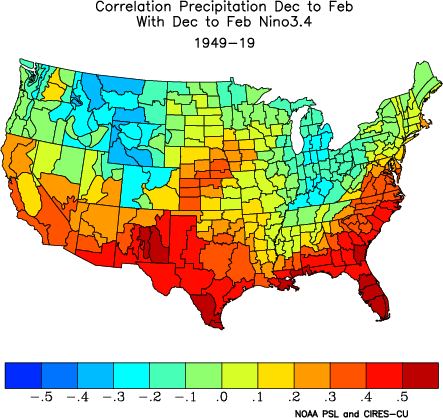 (Can't see image? Try: https://psl.noaa.gov/cgi-bin/data/usclimdivs/climdiv.corr.pl?variab=Precipitation&mon1=12&mon2=2&imonflag=0&iy%5B1%5D=&iy%5B2%5D=&type=8&timefile=&lagtype=0&ilead=0&ilag=0&xlow=&xhi=&xint=&Submit=Create+Plot)

In [15]:
# (a) Now calculate the correlations!

corr_DJF = xr.corr(DJF_sst,DJF_precip,dim='time')
corr_MAM = xr.corr(MAM_sst,MAM_precip,dim='time')
corr_JJA = xr.corr(JJA_sst,JJA_precip,dim='time')
corr_SON = xr.corr(SON_sst,SON_precip,dim='time')

print(corr_DJF) # just 2D spatial array - no time component - we took correlation over time dimension and therefore collapsed it

<xarray.DataArray (lat: 72, lon: 144)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * lat      (lat) float32 88.75 86.25 83.75 81.25 ... -83.75 -86.25 -88.75
  * lon      (lon) float32 1.25 3.75 6.25 8.75 11.25 ... 351.2 353.8 356.2 358.8


/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1670: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1670: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1670: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1670: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1670: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1670: RuntimeWa

In [16]:
# To automate plotting
# Let's concatenate these four seasonal correlation grids
# Into one data array!
# We create a new dimension called season

all_corr = xr.concat([corr_DJF,corr_MAM,corr_JJA,corr_SON],dim='season')
print(all_corr)

<xarray.DataArray (season: 4, lat: 72, lon: 144)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
     

< GeoAxes: <cartopy.crs.PlateCarree object at 0x7f7f364eddb0> >
< GeoAxes: <cartopy.crs.PlateCarree object at 0x7f7f364eddb0> >
< GeoAxes: <cartopy.crs.PlateCarree object at 0x7f7f364eddb0> >
< GeoAxes: <cartopy.crs.PlateCarree object at 0x7f7f364eddb0> >


/opt/conda/lib/python3.9/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/110m/physical/ne_110m_land.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)
/opt/conda/lib/python3.9/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/110m/physical/ne_110m_coastline.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)
/opt/conda/lib/python3.9/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_boundary_lines_land.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)
/opt/conda/lib/python3.9/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/50m/cultural/ne_50m_admin_1_states_provinces_lines.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


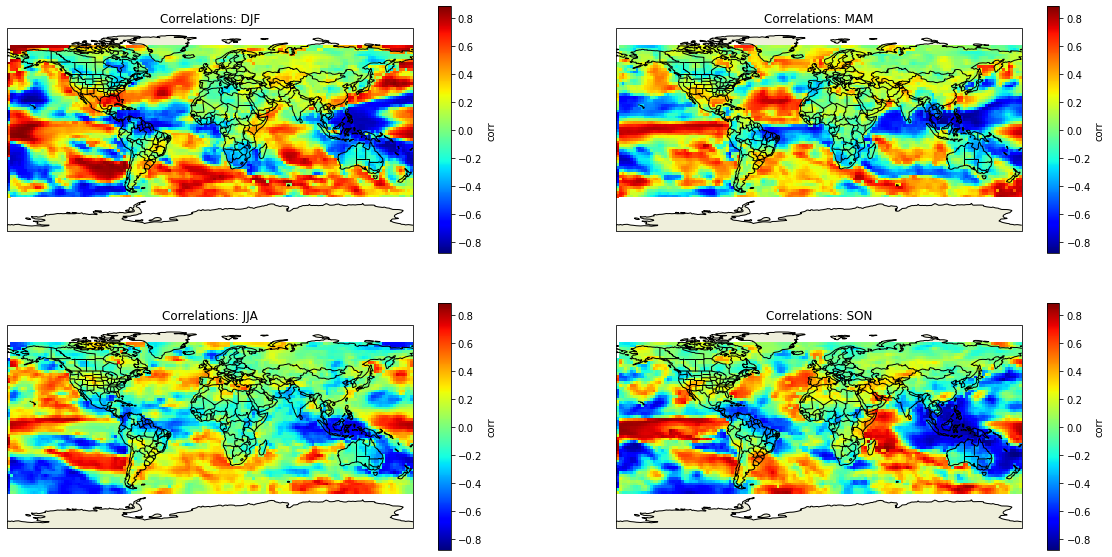

In [17]:
# (b) First plot globally for fun - so many cool teleconnections! YAY!

import cartopy.crs as ccrs 

cmap='jet'
fig, axes = plt.subplots(2,2,figsize=(20,10), subplot_kw=dict(projection=ccrs.PlateCarree()))


# Set up map stuff for later
states_provinces = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_1_states_provinces_lines',
    scale='50m',
    facecolor='none')
 
seasons=['DJF','MAM','JJA','SON']
# Iterate through axes and add titles and map stuffs
i = 0
for ax in axes.flatten():
    print(ax)
    all_corr.sel(season=i).plot(ax=ax,cmap=cmap,vmin=all_corr.min(),vmax=all_corr.max(),cbar_kwargs={'label': 'corr'})
    ax.set_title('Correlations: '+seasons[i])
    i = i+1
    ax.add_feature(cfeature.LAND)
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS)
    ax.add_feature(states_provinces, edgecolor='black')

< GeoAxes: <cartopy.crs.PlateCarree object at 0x7f7f3663c130> >
< GeoAxes: <cartopy.crs.PlateCarree object at 0x7f7f3663c130> >
< GeoAxes: <cartopy.crs.PlateCarree object at 0x7f7f3663c130> >
< GeoAxes: <cartopy.crs.PlateCarree object at 0x7f7f3663c130> >
4


/opt/conda/lib/python3.9/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/50m/physical/ne_50m_land.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)
/opt/conda/lib/python3.9/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/50m/physical/ne_50m_coastline.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)
/opt/conda/lib/python3.9/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/50m/cultural/ne_50m_admin_0_boundary_lines_land.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


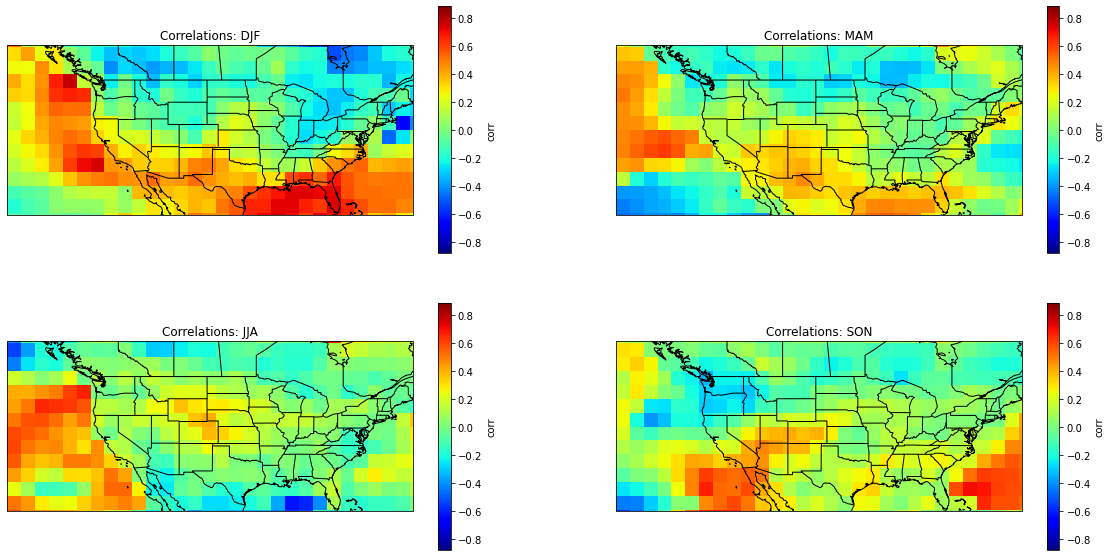

In [18]:
# Now just United States

import cartopy.crs as ccrs 

cmap='jet'
fig, axes = plt.subplots(2,2,figsize=(20,10), subplot_kw=dict(projection=ccrs.PlateCarree()))

# Set up map stuff for later
states_provinces = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_1_states_provinces_lines',
    scale='50m',
    facecolor='none')
 
seasons=['DJF','MAM','JJA','SON']
# Iterate through axes and plot each season, add titles, other features (map features)
i = 0
for ax in axes.flatten():
    print(ax)                                   # we want colorscale to be same for each plot   # label colorbar
    all_corr.sel(season=i).plot(ax=ax,cmap=cmap,vmin=all_corr.min(),vmax=all_corr.max(),cbar_kwargs={'label': 'corr'})
    ax.set_title('Correlations: '+seasons[i])
    i = i+1
    ax.add_feature(cfeature.LAND)
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS)
    ax.add_feature(states_provinces, edgecolor='black')
    ax.set_extent([360-140,360-66.95,49.35,24.74,])
print(i)
# To be directly comparable to NOAA's plot we'd use a different colorscale but this is close enough

In [19]:
# (c) Interpretation time!
# i. Here, a positive correlation means when SST anomalies in Nino 3.4 are higher, precipitation at that location tends to be greater
# and vice versa
# ii. There's a pretty strong positive correlation (relatively speaking) in the lower third of the US, especially in the Gulf
# of Mexico (higher SSTS = more precip in these regions); negative correlation in the Midwest (higher SSTs tend to be associated with
# less precipitation
# iii. El Nino 

# (d) Yes - this is quite similar to the plot from NOAA!

#### (6)  We could have, alternatively, or additionally, in the above analysis taken into account El Nino vs. La Nina years explicitly and then analyzed relationships.....but we'll stop here for today
- The key is that warmer SSTs in Nino 3.4 are generally associated with certain patterns in precipitation, and the same with colder SSTS in Nino 3.4

### (1). Using the Nino 3.4 region time series of SST for the season you identified in Week 13 In-Module Exercises as having the strong correlations, and precipitation data for this same season:
### Find the location of maximum correlation in the subregion of the US that is east of the Rockies, with the region defined as:
- **latitudes**: 24.7 N to 49.3 N
- **longitudes**: -104 W to -67 W


In [47]:
us_e_lat_l = 24.7
us_e_lat_u = 49.3
us_e_lon_l = 204
us_e_lon_u = 293
bounds_subset = all_corr.sel(lat=slice(us_e_lat_l, us_e_lat_u), lon=slice(us_e_lon_l, us_e_lon_u))
print(f'The maximum correlation is {all_corr.max()}')
lat_i = bounds_subset.idxmax(dim='lat')
# lon_i = bounds_subset.argmax(dim='lon')
print(type(bounds_subset))

The maximum correlation is <xarray.DataArray ()>
array(0.88511281)


ValueError: attempt to get argmax of an empty sequence

### (2). Plot a map of the correlations (your map at end of last homework), but now with this location of maximum correlation indicated with a discernible dot or other symbol.  

### PLEASE READ BELOW, THIS IS SUPER IMPORTANT

### Precipitation data-wise, for the rest of assignment you are ONLY using the time series of precipitation data from THIS location for the season you've identified.

### SST data-wise, for the rest of the assignment, you are ONLY using the time series of SST data from the Nino 3.4 region for that same season!

< GeoAxes: <cartopy.crs.PlateCarree object at 0x7f7f360e2860> >
< GeoAxes: <cartopy.crs.PlateCarree object at 0x7f7f360e2860> >
< GeoAxes: <cartopy.crs.PlateCarree object at 0x7f7f360e2860> >
< GeoAxes: <cartopy.crs.PlateCarree object at 0x7f7f360e2860> >


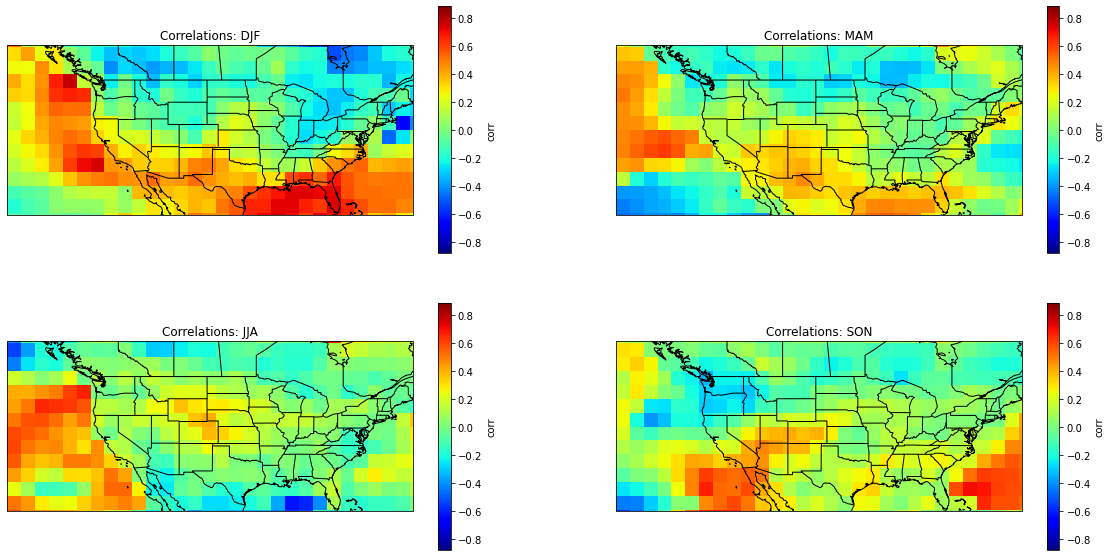

In [39]:
cmap='jet'
fig, axes = plt.subplots(2,2,figsize=(20,10), subplot_kw=dict(projection=ccrs.PlateCarree()))

# Set up map stuff for later
states_provinces = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_1_states_provinces_lines',
    scale='50m',
    facecolor='none')
 
seasons=['DJF','MAM','JJA','SON']
# Iterate through axes and plot each season, add titles, other features (map features)
i = 0
for ax in axes.flatten():
    print(ax)                                   # we want colorscale to be same for each plot   # label colorbar
    all_corr.sel(season=i).plot(ax=ax,cmap=cmap,vmin=all_corr.min(),vmax=all_corr.max(),cbar_kwargs={'label': 'corr'})
    ax.set_title('Correlations: '+seasons[i])
    i = i+1
    ax.add_feature(cfeature.LAND)
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS)
    ax.add_feature(states_provinces, edgecolor='black')
    ax.set_extent([360-140,360-66.95,49.35,24.74,])

### (3.) Create a plot consisting of two subplots, one being the time series of precipitation at this special location, and the other the time series of SSTs in the Nino 3.4 region.

(4.) Create a histogram for each the precipitation and the SST time series data. Be sure to plot the PDF for a theoretical normal distribution on each histogram as well, as this will help you interpret in the next Q.
​
​


(5.) In at least a few sentences for each (a.) and (b.):
(a.) Compare the time series plots for SST and precip.
(b.) Describe how each of these variables, SST and precip, are distributed, especially how they'd each compare to a theoretical normal distribution.
​
​


(6.) Given that you’re working with observations with a time component, do you expect to encounter issues with serial correlation? Why or why not?
​


(7.)
(a.) Create a scatterplot of the SST vs. precipitation.
(b.) In a few sentences, describe any relationship you see.
​
​


(8.) Run a linear regression to quantify this relationship. Plot your linear regression line against the raw scatterplot of data (as usual).
​
​


(9.) You know the drill! Calculate, plot for the residuals, and interpret (do NOT forget this extremely important step if you want full credit for this assignment) the following metrics for model evaluation:
(a.) R^2
(b.) RMSE
(c.) Statistical significance
(d.) Residuals (you must create and evaluate both the typical scatterplot AND a histogram with theoretical normal distribution fitted to it!)
​
​
​
​


(10.) In at least a few sentences:
(a.) Conclude how you think this model peforms overall, based on your evaluations in (9.)
(b.) Describe one way you could improve this model
if you’re not a meteorologist it’s fine if you don’t get ultra-specific on any scientific considerations - there are considerations beyond scientific ones as well!